In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sinusoidal_positional_encoding(seq_length, d):
    """
    Compute the sinusoidal positional encoding matrix.

    Args:
    - seq_length (int): Maximum sequence length.
    - d (int): Embedding size (must be even).

    Returns:
    - PE (torch.Tensor): (seq_length, d) matrix with positional encodings.
    """
    pos = np.arange(seq_length)[:, np.newaxis]  # Shape (seq_length, 1)
    i = np.arange(d // 2)  # Shape (d/2,)

    # Compute the denominator: 10000^(2i/d)
    denominator = np.power(10000, (2 * i) / d)

    # Compute PE using the given formula
    PE = np.zeros((seq_length, d))
    PE[:, 0::2] = np.sin(pos / denominator)  # PE(pos, 2i) = sin(pos / 10000^(2i/d))
    PE[:, 1::2] = np.cos(pos / denominator)  # PE(pos, 2i+1) = cos(pos / 10000^(2i/d))

    return torch.tensor(PE, dtype=torch.float32)

In [3]:
# Example usage
seq_length = 50  # Maximum sequence length
d = 128          # Embedding dimension (must be even)

positional_encodings = sinusoidal_positional_encoding(seq_length, d)
print(positional_encodings.shape)  # Expected output: (50, 128)

torch.Size([50, 128])


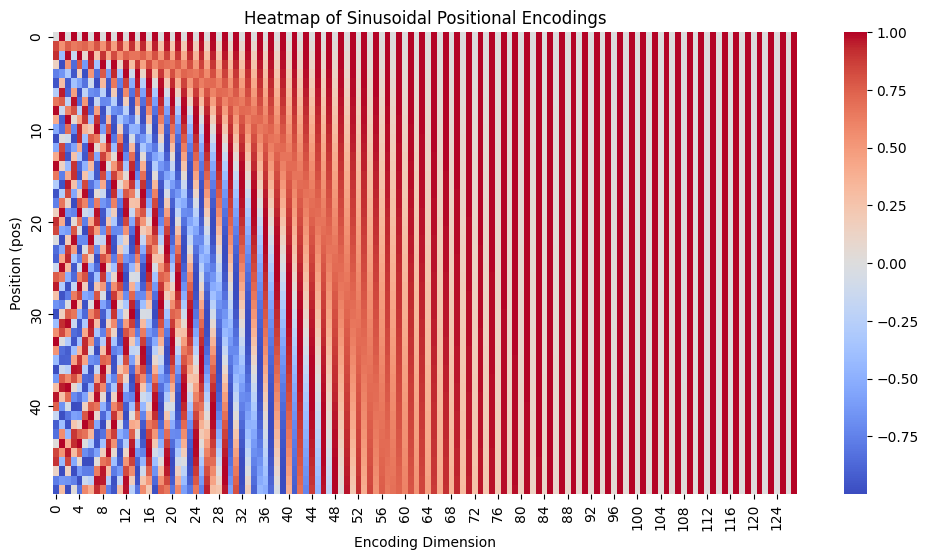

In [5]:
# Create a heatmap of the positional encodings
plt.figure(figsize=(12, 6))
sns.heatmap(positional_encodings, cmap="coolwarm", xticklabels=4, yticklabels=10)

plt.xlabel("Encoding Dimension")
plt.ylabel("Position (pos)")
plt.title("Heatmap of Sinusoidal Positional Encodings")
plt.show()